## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



## Crypto Arbitrage Analysis Report For Bitcoin.
 - We will only look at bitcoin on two exchanges, as they have some of the best liquidity to allow for quick trading opportunities. The two exchanges are:
     1) Bitstamp
     2) Coinbase

**Analyzing data from early 2018 and determine if arbitrage of bitcoin is a viable business opportunity.** *Find three dates to do a deep dive into and determine profits per trade and cumulative profits over the day.* 

**Assumptions:**

    1) Analysis is based on closing price only, we can buy and sell based on the daily low price, open and high price to provide a more in depth analysis. 

###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('Resources/bitstamp.csv'), index_col = 'Timestamp', parse_dates = True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path('Resources/coinbase.csv'), index_col = 'Timestamp', parse_dates = True, infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# Check for the number of NaN values.
display(bitstamp.isnull().sum())
bitstamp = bitstamp.dropna().copy()
# Checking to see if the NAN values have been deleated.
display(bitstamp.isnull().sum())


Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$','')
bitstamp.head()

C:\Users\Jas\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [43]:
# Convert the Close data type to a float
# Checking dtypes of data
# display(bitstamp.dtypes) # Check!
bitstamp['Close'] = bitstamp['Close'].astype("float")
# All bitstamp data is now float data type.
display(bitstamp.dtypes)

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
# There are no duplicated as expected, as the data is time stamped.

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
display(coinbase.isnull().sum())
coinbase = coinbase.dropna().copy()
display(coinbase.isnull().sum())

coinbase['Close'] = coinbase['Close'].str.replace('$','')
display(coinbase.head())

coinbase['Close'] = coinbase['Close'].astype("float")
display(coinbase.dtypes)

display(bitstamp.duplicated().sum())

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

C:\Users\Jas\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


# Assumption:
1) Analysis is based on closing price.

In [ ]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Bitcoin Prices'}, xlabel='Time', ylabel='US Dollars ($)'>

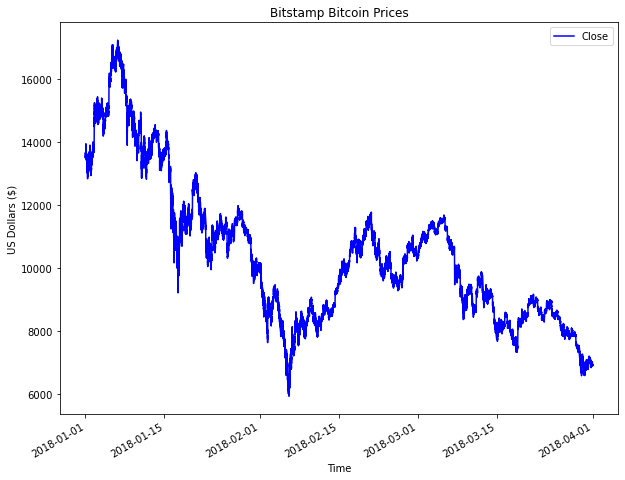

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind='line', figsize = (10,8), title = 'Bitstamp Bitcoin Prices', color ='blue', legend = True, ylabel = 'US Dollars ($)', xlabel = 'Time')

<AxesSubplot:title={'center':'Coinbase Bitcoin Prices'}, xlabel='Time', ylabel='US Dollars ($)'>

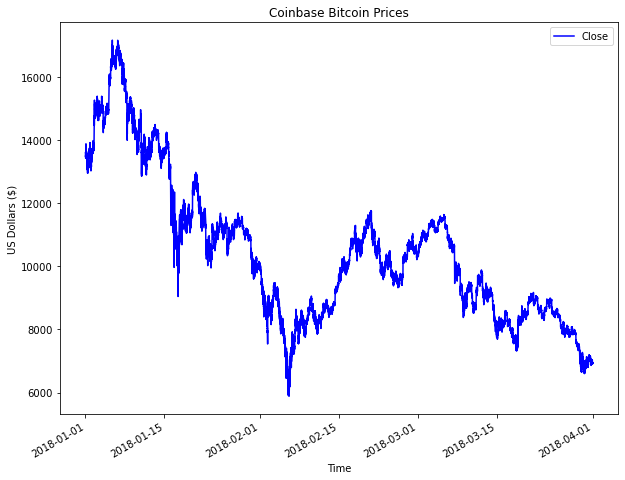

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind='line', figsize = (10,8), title = 'Coinbase Bitcoin Prices', color ='blue', legend = True, ylabel = 'US Dollars ($)', xlabel = 'Time')

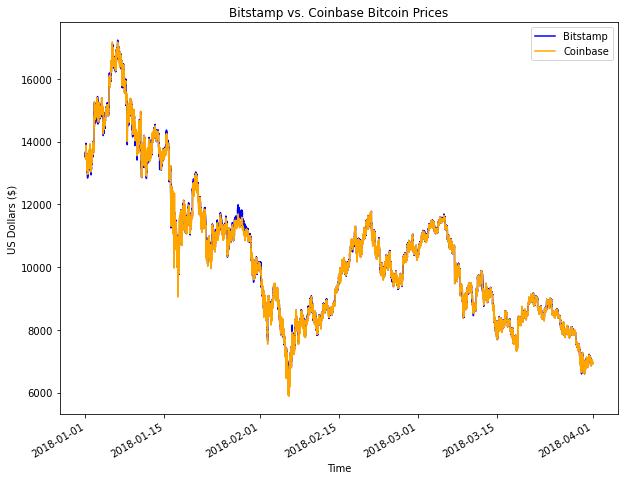

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.plot(kind='line', figsize = (10,8), title = 'Bitstamp vs. Coinbase Bitcoin Prices', color = 'blue', legend = True, ylabel = 'US Dollars ($)', xlabel = 'Time')

coinbase_sliced.plot(color = 'orange', xlabel = 'Time', ax=ax)

ax.legend(["Bitstamp","Coinbase"])

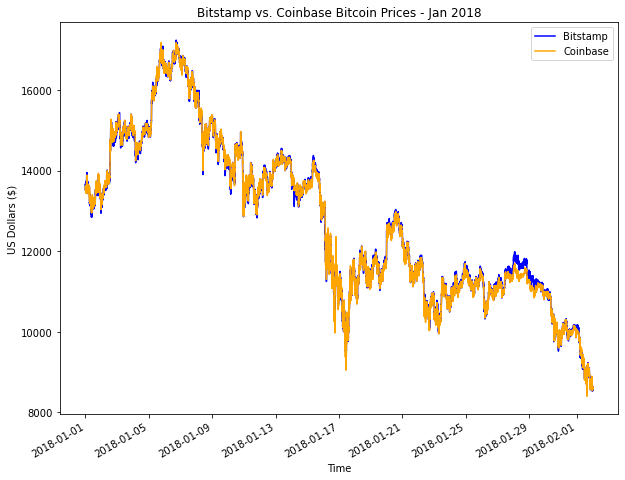

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(kind='line',
                                                         figsize = (10,8), 
                                                         title = 'Bitstamp vs. Coinbase Bitcoin Prices - Jan 2018', 
                                                         color = 'blue', 
                                                         legend = True, 
                                                         ylabel = 'US Dollars ($)', 
                                                         xlabel = 'Time')
coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(color = 'orange', xlabel = 'Time', ax=ax)
ax.legend(["Bitstamp","Coinbase"])

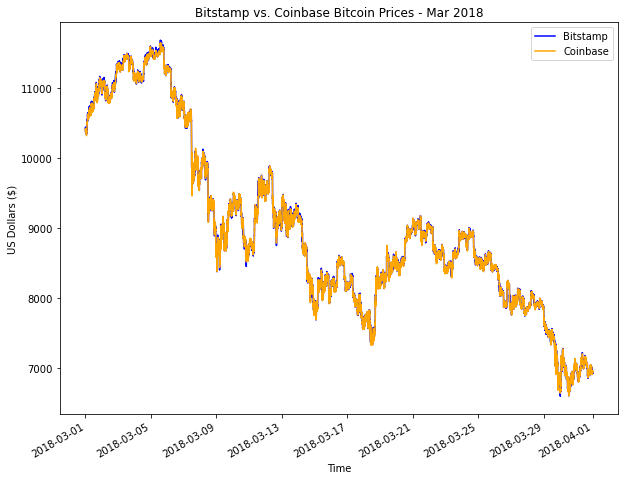

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax = bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot(kind='line',
                                                         figsize = (10,8), 
                                                         title = 'Bitstamp vs. Coinbase Bitcoin Prices - Mar 2018', 
                                                         color = 'blue', 
                                                         legend = True, 
                                                         ylabel = 'US Dollars ($)', 
                                                         xlabel = 'Time')
coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot(color = 'orange', xlabel = 'Time', ax=ax)
ax.legend(["Bitstamp","Coinbase"])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, there were better opportunities in earlier in the time period extracted. The spread tightened later in the analysis period. When you overlay the Bitstamp vs Coinbase data for Jan 2018, you can see the price in Bitstamp is higher than at Coinbase. This is the arbitrage opportunity we seek.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

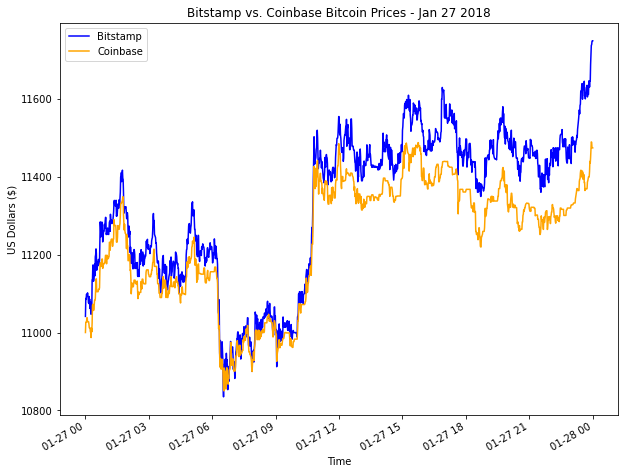

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00'].plot(kind='line',
                                                         figsize = (10,8), 
                                                         title = 'Bitstamp vs. Coinbase Bitcoin Prices - Jan 27 2018', 
                                                         color = 'blue', 
                                                         legend = True, 
                                                         ylabel = 'US Dollars ($)', 
                                                         xlabel = 'Time')

coinbase_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00'].plot(color = 'orange', xlabel = 'Time', ax=ax)

ax.legend(["Bitstamp","Coinbase"])

**Significant dislocation are present on Jan 27 2018. This is a great opportunity.**

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00'] - coinbase_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00']

# Generate summary statistics for the early DataFrame
#display(bitstamp_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00'].head())
#display(coinbase_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00'].head())
#display(arbitrage_spread_early.head())
arbitrage_spread_early.describe()

count    1422.000000
mean       84.692792
std        52.051395
min       -35.950000
25%        47.432500
50%        75.955000
75%       116.615000
max       275.380000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitage Spread - Bitstamp vs. Coinbase - Early'}, ylabel='US Dollars ($)'>

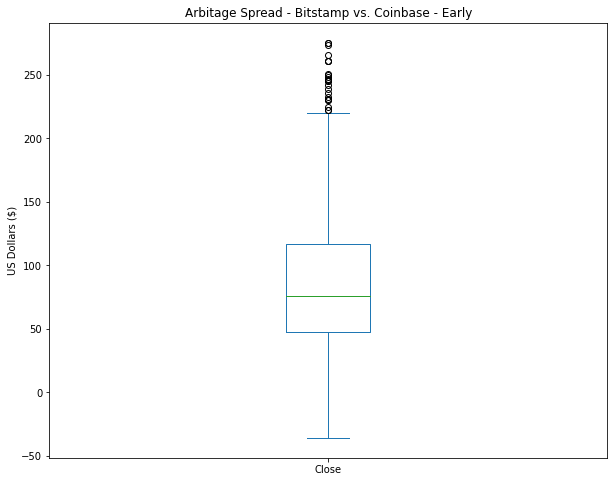

In [50]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box(figsize = (10,8), title = 'Arbitage Spread - Bitstamp vs. Coinbase - Early',ylabel = 'US Dollars ($)')

*On the early day of Jan 27 2018, was a low risk arbitrage trading day with large dislocations in the market, with an average profit of $52.05 and maximum of $275.38 per trade per coin.*

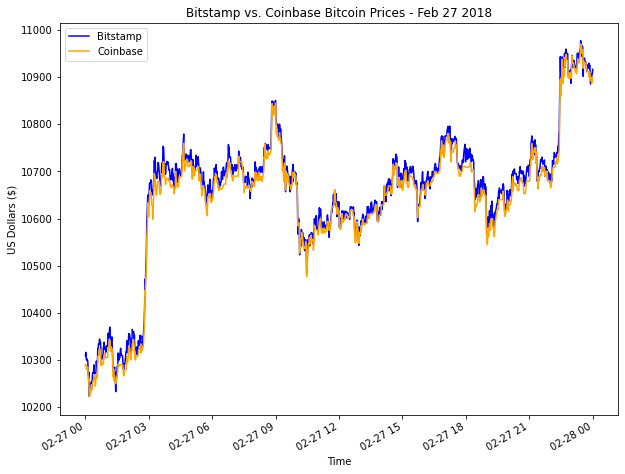

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`,`title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'].plot(kind='line',
                                                         figsize = (10,8), 
                                                         title = 'Bitstamp vs. Coinbase Bitcoin Prices - Feb 27 2018', 
                                                         color = 'blue', 
                                                         legend = True, 
                                                         ylabel = 'US Dollars ($)', 
                                                         xlabel = 'Time')

coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'].plot(color = 'orange', xlabel = 'Time', ax=ax)

ax.legend(["Bitstamp","Coinbase"])

**Feb 27 2018, you can still see market opportunity with dislocation similar to Jan 2018. Opportunity is still present in the market.**

In [47]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00'] - coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       14.260641
std        10.748043
min       -35.030000
25%         7.675000
50%        14.235000
75%        20.982500
max        51.550000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitage Spread - Bitstamp vs. Coinbase - Middle'}, ylabel='US Dollars ($)'>

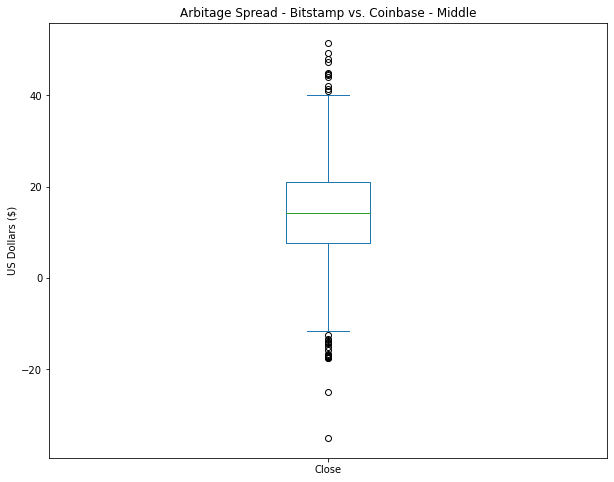

In [49]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot.box(figsize = (10,8), title = 'Arbitage Spread - Bitstamp vs. Coinbase - Middle',ylabel = 'US Dollars ($)')

*There is an increase in market risk, with a mean profit of 14.26 dollars and max profit of 51.55 dollars. Opportunity is still present in this market. Equal number of outliers on the upper and lower boundary.*

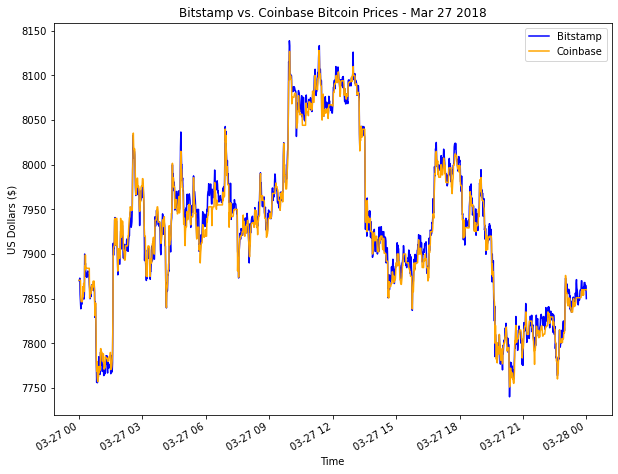

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-03-27 00:00:00':'2018-03-28 00:00:00'].plot(kind='line',
                                                         figsize = (10,8), 
                                                         title = 'Bitstamp vs. Coinbase Bitcoin Prices - Mar 27 2018', 
                                                         color = 'blue', 
                                                         legend = True, 
                                                         ylabel = 'US Dollars ($)', 
                                                         xlabel = 'Time')

coinbase_sliced.loc['2018-03-27 00:00:00':'2018-03-28 00:00:00'].plot(color = 'orange', xlabel = 'Time', ax=ax)


ax.legend(["Bitstamp","Coinbase"])

**Market dislocaions are still present however the downside risk is increasing.** 

In [48]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late =  bitstamp_sliced.loc['2018-03-27 00:00:00':'2018-03-28 00:00:00'] - coinbase_sliced.loc['2018-03-27 00:00:00':'2018-03-28 00:00:00']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1439.000000
mean        3.122293
std         8.752169
min       -27.340000
25%        -2.870000
50%         3.330000
75%         8.955000
max        31.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitage Spread - Bitstamp vs. Coinbase - Late'}, ylabel='US Dollars ($)'>

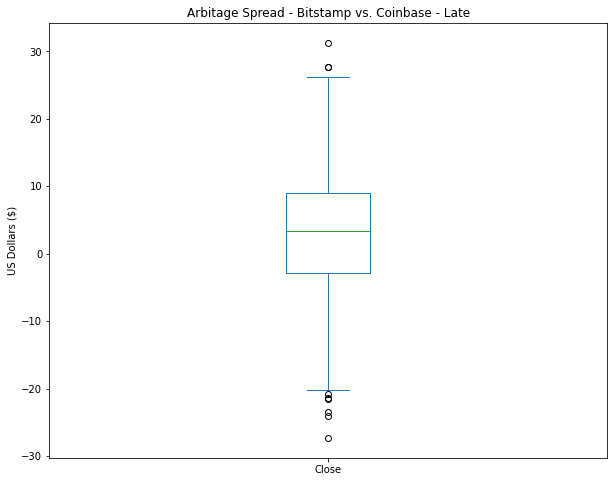

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box(figsize = (10,8), title = 'Arbitage Spread - Bitstamp vs. Coinbase - Late',ylabel = 'US Dollars ($)')

*The mean has decline and dislocation are less prominant. Mean is 3.12 with a small standard deviation of 8.75. The max is 31.27. The whiskers extend far into both directions and there are more outliers on the downside. Trading is more risky with more downside risk.*

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00'] - coinbase_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

arbitrage_spread = arbitrage_spread_early > 0
arbitrage_spread.sum()

1397

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= bitstamp_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00']/coinbase_sliced.loc['2018-01-27 00:00:00':'2018-01-28 00:00:00']
spread_return_middle = bitstamp_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']/coinbase_sliced.loc['2018-02-27 00:00:00':'2018-02-28 00:00:00']
spread_return_late = bitstamp_sliced.loc['2018-03-27 00:00:00':'2018-03-28 00:00:00']/coinbase_sliced.loc['2018-03-27 00:00:00':'2018-03-28 00:00:00']
# Review the spread return DataFrame
display(spread_return_early)
display(spread_return_middle)
display(spread_return_late)

Timestamp
2018-01-27 00:00:00    1.003774
2018-01-27 00:01:00    1.005542
2018-01-27 00:02:00    1.005324
2018-01-27 00:03:00    1.006529
2018-01-27 00:04:00    1.005314
                         ...   
2018-01-27 23:56:00    1.021584
2018-01-27 23:57:00    1.021847
2018-01-27 23:58:00    1.023851
2018-01-27 23:59:00    1.023999
2018-01-28 00:00:00    1.023999
Name: Close, Length: 1441, dtype: float64

Timestamp
2018-02-27 00:00:00    1.001825
2018-02-27 00:01:00    1.002556
2018-02-27 00:02:00    1.001550
2018-02-27 00:03:00    1.001944
2018-02-27 00:04:00    1.001725
                         ...   
2018-02-27 23:56:00    1.000201
2018-02-27 23:57:00    1.000505
2018-02-27 23:58:00    1.001628
2018-02-27 23:59:00    1.000891
2018-02-28 00:00:00    1.001482
Name: Close, Length: 1441, dtype: float64

Timestamp
2018-03-27 00:00:00    0.999930
2018-03-27 00:01:00    0.999997
2018-03-27 00:02:00    1.000295
2018-03-27 00:03:00    0.998000
2018-03-27 00:04:00    0.997026
                         ...   
2018-03-27 23:56:00    1.001015
2018-03-27 23:57:00    0.999994
2018-03-27 23:58:00    1.000637
2018-03-27 23:59:00    1.000289
2018-03-28 00:00:00    0.998734
Name: Close, Length: 1441, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [31]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early - 1
profitable_trades_middle = spread_return_middle - 1 
profitable_trades_late = spread_return_late - 1
# Review the first five profitable trades
print(profitable_trades_early[(profitable_trades_early>0)].head(5))
print(profitable_trades_middle[(profitable_trades_middle>0)].head(5))
print(profitable_trades_late[(profitable_trades_late>0)].head(5))
       

Timestamp
2018-01-27 00:00:00    0.003774
2018-01-27 00:01:00    0.005542
2018-01-27 00:02:00    0.005324
2018-01-27 00:03:00    0.006529
2018-01-27 00:04:00    0.005314
Name: Close, dtype: float64
Timestamp
2018-02-27 00:00:00    0.001825
2018-02-27 00:01:00    0.002556
2018-02-27 00:02:00    0.001550
2018-02-27 00:03:00    0.001944
2018-02-27 00:04:00    0.001725
Name: Close, dtype: float64
Timestamp
2018-03-27 00:02:00    0.000295
2018-03-27 00:06:00    0.000127
2018-03-27 00:09:00    0.000129
2018-03-27 00:10:00    0.000023
2018-03-27 00:12:00    0.000316
Name: Close, dtype: float64


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [32]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early = profitable_trades_early[profitable_trades_early>0]
profitable_trades_middle = profitable_trades_middle[profitable_trades_middle>0]
profitable_trades_late = profitable_trades_late[profitable_trades_late>0]
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

count    1397.000000
mean        0.007644
std         0.004459
min         0.000016
25%         0.004413
50%         0.006811
75%         0.010355
max         0.023999
Name: Close, dtype: float64

count    1.325000e+03
mean     1.506661e-03
std      8.570981e-04
min      9.132303e-07
25%      8.519762e-04
50%      1.436414e-03
75%      2.036875e-03
max      4.863919e-03
Name: Close, dtype: float64

count    921.000000
mean       0.001038
std        0.000728
min        0.000001
25%        0.000472
50%        0.000897
75%        0.001480
max        0.003887
Name: Close, dtype: float64

**Profitiable trades on Jan 27 2018 was 1397, on Feb 27 2018 was 1325 and on Mar 27 2018 was 921. In addition to less profitable trades, trade profitability is lower.** 

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

''' Alternate Method
joined_profits_vs_coinbase = pd.concat([profitable_trades_early, coinbase_sliced],axis = "columns", join = "inner")
joined_profits_vs_coinbase.columns = ['spread', 'close']
joined_profits_vs_coinbase['profit'] = joined_profits_vs_coinbase['spread']*joined_profits_vs_coinbase['close']
display(joined_profits_vs_coinbase)
'''
# I double checked to ensure both methods resulted the same results.
profit_early = profitable_trades_early*coinbase_sliced
profit_middle = profitable_trades_middle*coinbase_sliced
profit_late = profitable_trades_late*coinbase_sliced


        
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()
# View the early profit DataFrame
display(profit_per_trade_early)
#display(profit_per_trade_middle)
#display(profit_per_trade_late)

Timestamp
2018-01-27 00:00:00     41.51
2018-01-27 00:01:00     61.11
2018-01-27 00:02:00     58.70
2018-01-27 00:03:00     71.99
2018-01-27 00:04:00     58.66
                        ...  
2018-01-27 23:56:00    248.00
2018-01-27 23:57:00    251.00
2018-01-27 23:58:00    273.68
2018-01-27 23:59:00    275.38
2018-01-28 00:00:00    275.38
Name: Close, Length: 1397, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
display(profit_per_trade_early.describe())
#display(profit_per_trade_middle.describe())
#display(profit_per_trade_late.describe())

count    1397.000000
mean       86.396457
std        50.904461
min         0.180000
25%        49.490000
50%        76.960000
75%       117.860000
max       275.380000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Trading Profit Range for Jan 27 2018'}, xlabel='Date', ylabel='profit'>

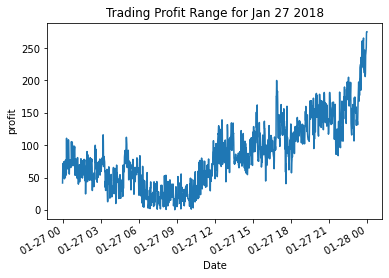

In [35]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(kind = 'line', title = 'Trading Profit Range for Jan 27 2018', xlabel = 'Date', ylabel = 'profit')

<AxesSubplot:title={'center':'Trading Profit Range for Feb 27 2018'}, xlabel='Date', ylabel='profit'>

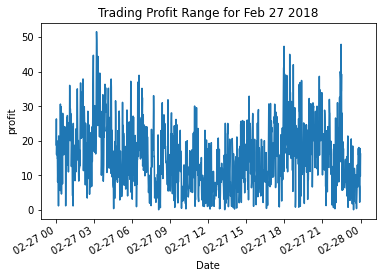

In [36]:
# Trading profit for Feb 28 2018
profit_per_trade_middle.plot(kind = 'line', title = 'Trading Profit Range for Feb 27 2018', xlabel = 'Date', ylabel = 'profit')

<AxesSubplot:title={'center':'Trading Profit Range for Mar 27 2018'}, xlabel='Date', ylabel='profit'>

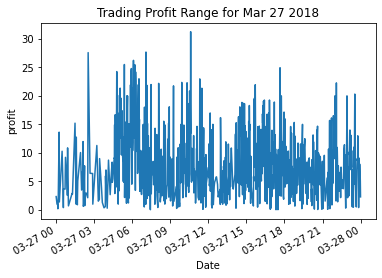

In [37]:
# Trading profit for Mar 28 2018
profit_per_trade_late.plot(kind = 'line', title = 'Trading Profit Range for Mar 27 2018', xlabel = 'Date', ylabel = 'profit')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [38]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
print(f"The profit for earlier(Jan 27 2018) trading day is USD: ${profit_per_trade_early.sum(): .2f}")
print(f"The profit for middle(Feb 27 2018) trading day is USD: ${profit_per_trade_middle.sum(): .2f}")
print(f"The profit for late(Mar 27 2018) trading day is USD: ${profit_per_trade_late.sum(): .2f}")

The profit for earlier(Jan 27 2018) trading day is USD: $ 120695.85
The profit for middle(Feb 27 2018) trading day is USD: $ 21210.17
The profit for late(Mar 27 2018) trading day is USD: $ 7584.66


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [39]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

cumulative_profit_middle = profit_per_trade_middle.cumsum()

cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative profits for "early" Jan 27 2018'}, xlabel='Date', ylabel='profit'>

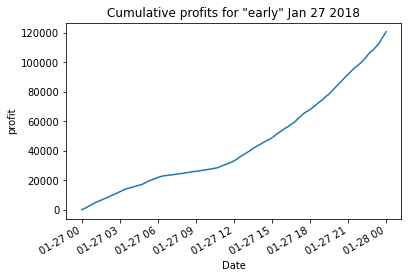

In [40]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(kind = 'line', title = 'Cumulative profits for "early" Jan 27 2018', xlabel = 'Date', ylabel = 'profit')

<AxesSubplot:title={'center':'Cumulative profits for "middle" Feb 27 2018'}, xlabel='Date', ylabel='profit'>

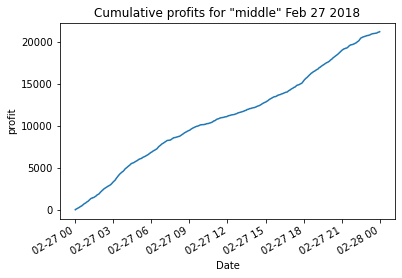

In [41]:
cumulative_profit_middle.plot(kind = 'line', title = 'Cumulative profits for "middle" Feb 27 2018', xlabel = 'Date', ylabel = 'profit')

<AxesSubplot:title={'center':'Cumulative profits for "late" Mar 27 2018'}, xlabel='Date', ylabel='profit'>

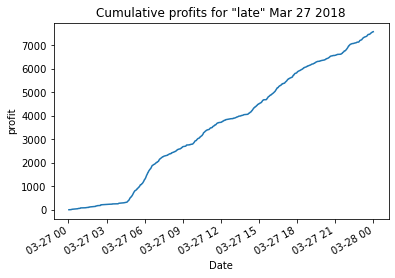

In [42]:
cumulative_profit_late.plot(kind = 'line', title = 'Cumulative profits for "late" Mar 27 2018', xlabel = 'Date', ylabel = 'profit')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Profits were larger and more consistent earlier in the period (2018), traders on Bitstamp were more bullish than trader on Coinbase. Liquidity vs trading volume needs to be analyzed for Bitstamp to determine if traders were more bullish, as this arbitrage opportunity occurred during a market selloff. For example arbitrage profits on Jan 27 2018 are multiples times larger than Mar 27 2018. As this is a daily profit and cumulative profits, this is a significant amount. Looking at the trading profit range, Jan 28 2018 represents a low risk trading environment generating the largest arbitrage profits. This also mean the exchanges were experience the greatest slippage during this period vs. period later in the range (Mar 27 2018) when the exchanges were experiencing the smallest slippage.